In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob

In [2]:
# quitar nan

def NanOff(df):
    new = pd.DataFrame(df)
    new = new.replace(np.nan,'0')
    return new

In [3]:
DFrameArray = []
FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Databases/*.xls'):
        df = pd.read_excel(f,sheet_name='hoja1')
        df = NanOff(df) # TAKE OUT THE NAN ENTRIES
        
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index='True')
    
    return dft

In [4]:
# each element in DFrameArray is a dataframe for each section

# dft contains all the information of the group
dft = OneDataFrame()

In [5]:
print(FileNames)

['Databases/202110_39422_Lista de clase.xls', 'Databases/202110_39380_Lista de clase.xls', 'Databases/202110_10468_Lista de clase.xls', 'Databases/202110_39384_Lista de clase.xls']


In [6]:
# Uso de filtros por columna
#DFrameArray[0].filter(items=['ID','A1','A2'])
DFrameArray[2].filter(like='Nota',axis=1)

# Seleccion por filar
#DFrameArray[2].set_index('A1')
#print(DFrameArray[2].loc[0:3])

,Nota1,Nota2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
#Select the information by columns
for i in range(1,3):
    print(DFrameArray[2]['A'+str(i)])

0    0.5
1    0.7
2    0.3
3    1.0
4    0.8
5    0.3
6    0.2
7    0.7
8    0.6
9    0.9
Name: A1, dtype: float64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: A2, dtype: object


In [8]:
# Vamos a hacer corte

print(DFrameArray[2][DFrameArray[2]['A1']<0.7])
A1 = DFrameArray[2]['A1']
A1 = np.array(A1)
print(A1)

                           Nombre         ID Nota1   A1 B1 C1 D1 E1 F1 Nota2  \
0  GALVIS CORREA, ANDRES FERNANDO  201632930     0  0.5  0  0  0  0  0     0   
2     IBARRA MUÑOZ, DAVID OCTAVIO  202014446     0  0.3  0  0  0  0  0     0   
5   MORENO SUAREZ, DORIS NATHALIA  201820035     0  0.3  0  0  0  0  0     0   
6    SANCHEZ PAZOS, CAMILO ANDRES  202113026     0  0.2  0  0  0  0  0     0   
8         VERA ANAYA, MARIA PAULA  202113340     0  0.6  0  0  0  0  0     0   

  A2 B2 C2 D2 E2 F2  
0  0  0  0  0  0  0  
2  0  0  0  0  0  0  
5  0  0  0  0  0  0  
6  0  0  0  0  0  0  
8  0  0  0  0  0  0  
[0.5 0.7 0.3 1.  0.8 0.3 0.2 0.7 0.6 0.9]


0.3    2
0.7    2
0.2    1
0.9    1
0.6    1
0.8    1
1.0    1
0.5    1
Name: A1, dtype: int64


<IPython.core.display.Javascript object>


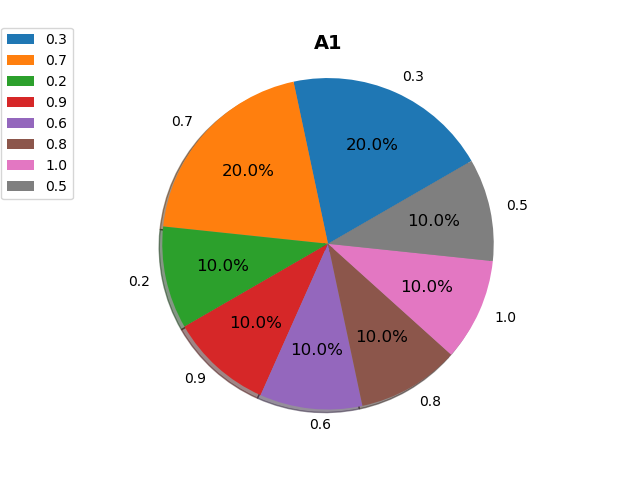

In [12]:
# Plotting pies


sizes = DFrameArray[2]['A1'].value_counts()
print(sizes)
pie = DFrameArray[2]['A1'].value_counts().plot(kind='pie', shadow=True,\
                                              autopct='%1.1f%%', startangle=30,\
                                              radius=1.5,center=(0.5,0.5),\
                                              textprops={'fontsize':12},frame=False,\
                                              pctdistance=0.65)
pie.set_ylabel('')
pie.set_xlabel('')


labels=sizes.index.unique()
plt.gca().axis('equal')
plt.title(DFrameArray[2].columns[3], weight='bold',size=14)
plt.legend(labels, bbox_to_anchor=(0.,1.1))


plt.savefig('Figures/A1.pdf',dpi=100,bbox_inches='tight')


In [10]:
# Write the whole dataframe in an excel file

output = pd.ExcelWriter('DataBaseFisicaI.xls')
dft.to_excel(output,'Hoja1')
output.save()